# Page Rank and HITS

_Deadline: 05.03.2019 at 23:59_

In [1]:
# Usual and mandatory stuff...

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

This lab will be playing with the algorithms Page Rank and HITS.

## Task 1

First, we shall look at our good friends from this karate club. Let us pick several values for coefficient $\alpha$ and see what we get.

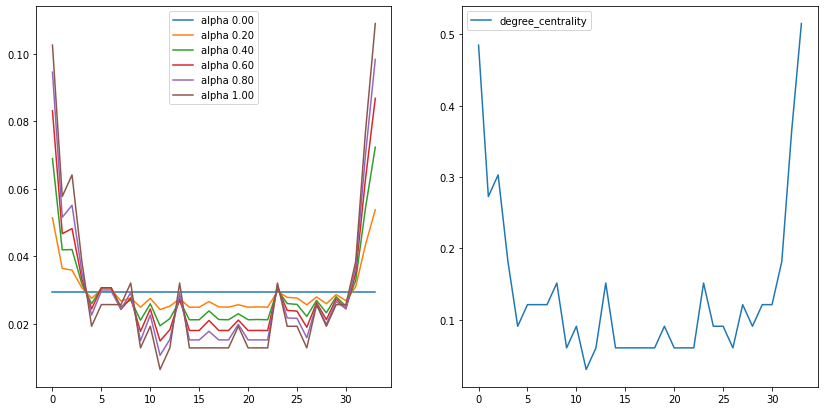

In [9]:
G = nx.karate_club_graph()

fig = plt.figure(1, figsize=(14,7))

ax = plt.subplot(121) # Plotting PR for several alphas    
alphas = np.arange(0, 1.1, 0.2)
for alp in alphas:
    pr = nx.pagerank(G, alpha=alp)
    prval = list(pr.values())
    ax.plot(prval, label='alpha {0:.2f}'.format(alp))
ax.legend()

ay = plt.subplot(122) # Plotting Degree centrality
dc = list(nx.degree_centrality(G).values())
ay.plot(dc, label="degree_centrality")
ay.legend()


a) How can you normalize degree centrality so that it sums up to 1? Do it and plot all these on the same plot.

We divide measures by its sum.  
Resulting graph is identical to pagerank with alpha=1, just as we expected.

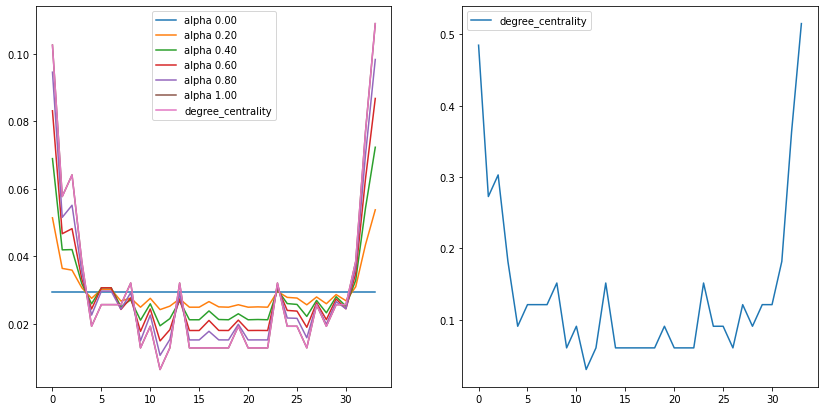

In [13]:
G = nx.karate_club_graph()

fig = plt.figure(1, figsize=(14,7))

ax = plt.subplot(121) # Plotting PR for several alphas    
alphas = np.arange(0, 1.1, 0.2)
for alp in alphas:
    pr = nx.pagerank(G, alpha=alp)
    prval = list(pr.values())
    ax.plot(prval, label='alpha {0:.2f}'.format(alp))
# ax.legend()

ay = plt.subplot(122)
dc = list(nx.degree_centrality(G).values())
ay.plot(dc, label="degree_centrality")
ay.legend()
dc = [x/sum(dc) for x in dc]
ax.plot(dc, label="degree_centrality")
ax.legend()



_And this is where you explain what you see and why._

b) In order to see how fast it converges, we shall need to code our own Page Rank algorithm. Code a function ```mypagerank(G,alpha,k)``` which executes the power iteration $k$ times starting from the uniform distribution among nodes in the graph. It should return the list of page rank scores. Recall that
$$ \mathbf{p}^{t+1} = \alpha (D^{-1}A)^{\top}\mathbf{p} + (1-\alpha)\frac{\mathbf{e}}{n}, $$
where $A$ is the adjacency matrix of $G$ and $D$ is the diagonal matrix made of degrees of vertices.

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [37]:
## Reminder: A @ B computes the multiplication of matrices A and B.

def mypagerank(G,alpha,k):
    degrees=[x[1] for x in list(G.degree)]
    A = nx.adj_matrix(G)
    D = np.diag(degrees)
    e = np.ones_like(degrees)
    p = np.ones_like(degrees)/len(degrees)
    for i in range(k):
        p = alpha*(np.linalg.inv(D)@A).T@p + (1-alpha) * e/len(degrees)
    return p


Alright, let us see how it goes...

c) Plot the results after 0 up to 10 iterations.

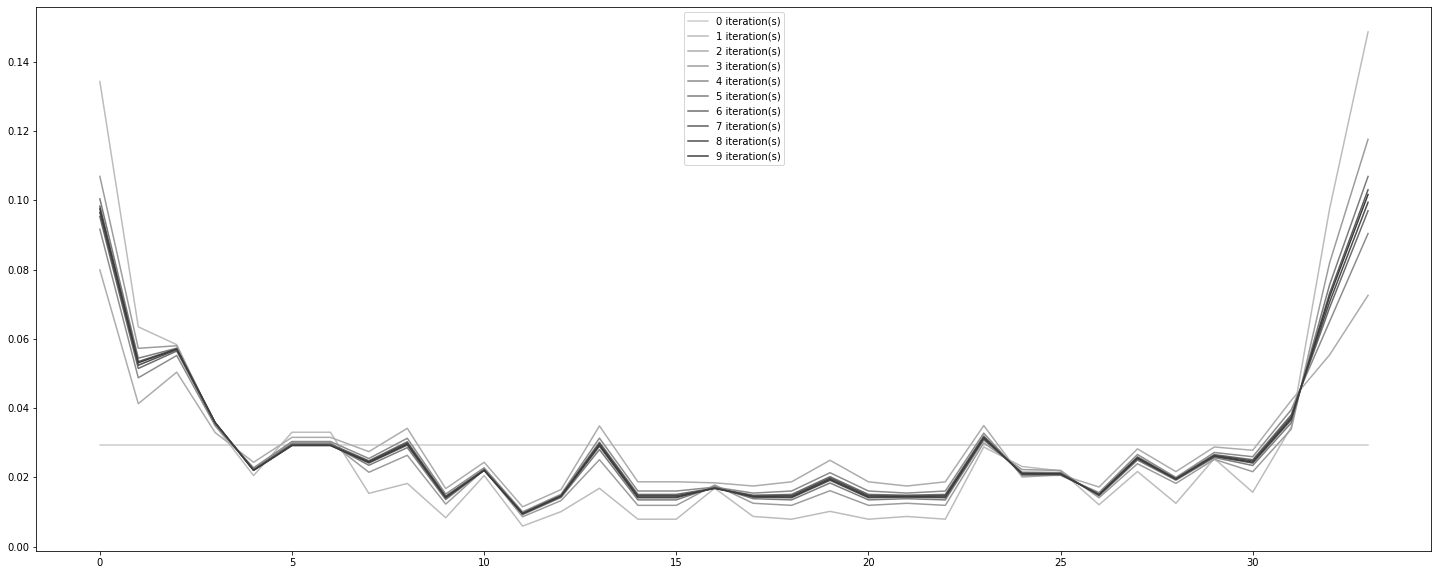

In [48]:

fig = plt.figure(1, figsize=(25,10))
ax = plt.subplot(111)    

its = np.arange(0,10, 1)

for it in its:
    pr = mypagerank(G, 0.85, it)
    prval = list(pr)
    ax.plot(prval, label='{:d} iteration(s)'.format(it), color=str(1-((it/16)+0.2)))
    
ax.legend()

d) Pay attention to the order of colors. What do you observe? How can you explain it?

Results converge in an oscillatory fashion - algorithm has some correct answer in limit.
We can demonstrate it more clearly if we apply gradient to colors.

e) Plot Page Rank vs Degree Centrality for $\alpha$ in $\{0,0.5,1\}$.  
behavior is predictable:
1. $\alpha=0$, we teleport all the time, uniform distribution independent of centrality
2. $\alpha=1$, we never teleport, the model is basically random walk, which makes low-centrality nodes have less pagerank and high-centrality - more.
3. $\alpha=0.5$, something in between.

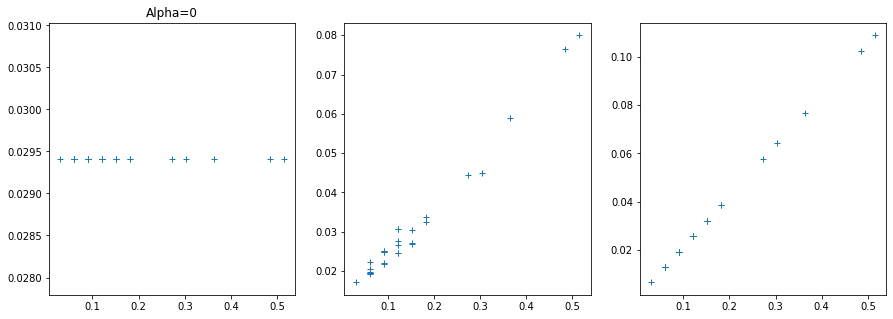

In [51]:
fig = plt.figure(1, figsize=(15,5))

d = nx.degree_centrality(G)
d =list( d.values())

ax = plt.subplot(131)    
pr = nx.pagerank(G, alpha=0)
pr = list(pr.values())
ax.plot(d, pr, '+')
ax.set_title('Alpha=0')

ay = plt.subplot(132)    
pr = nx.pagerank(G, alpha=0.5)
pr = list(pr.values())
ay.plot(d, pr, '+')
ax.set_title('Alpha=0.5')

az = plt.subplot(133)    
pr = nx.pagerank(G, alpha=1)
pr = list(pr.values())
az.plot(d, pr, '+')
ax.set_title('Alpha=1')


## Task 2 

Experiment several teleportation vectors on the coappearance network of characters in the novel _Les Misérables_ (V. Hugo). The graph is in the file `lesmis.gml`. It was compiled by Donald Knuth [1]. Try to focus on several famous characters (Valjean, Javert, Gavroche, Cosette), or use betweenness centrality (is degree centrality of interest here?) for the teleportation. Each time, draw the network induced by nodes with high page rank. What can you observe?


[1] D. E. Knuth, _The Stanford GraphBase: A Platform for Combinatorial Computing_, Addison-Wesley, Reading, MA (1993).

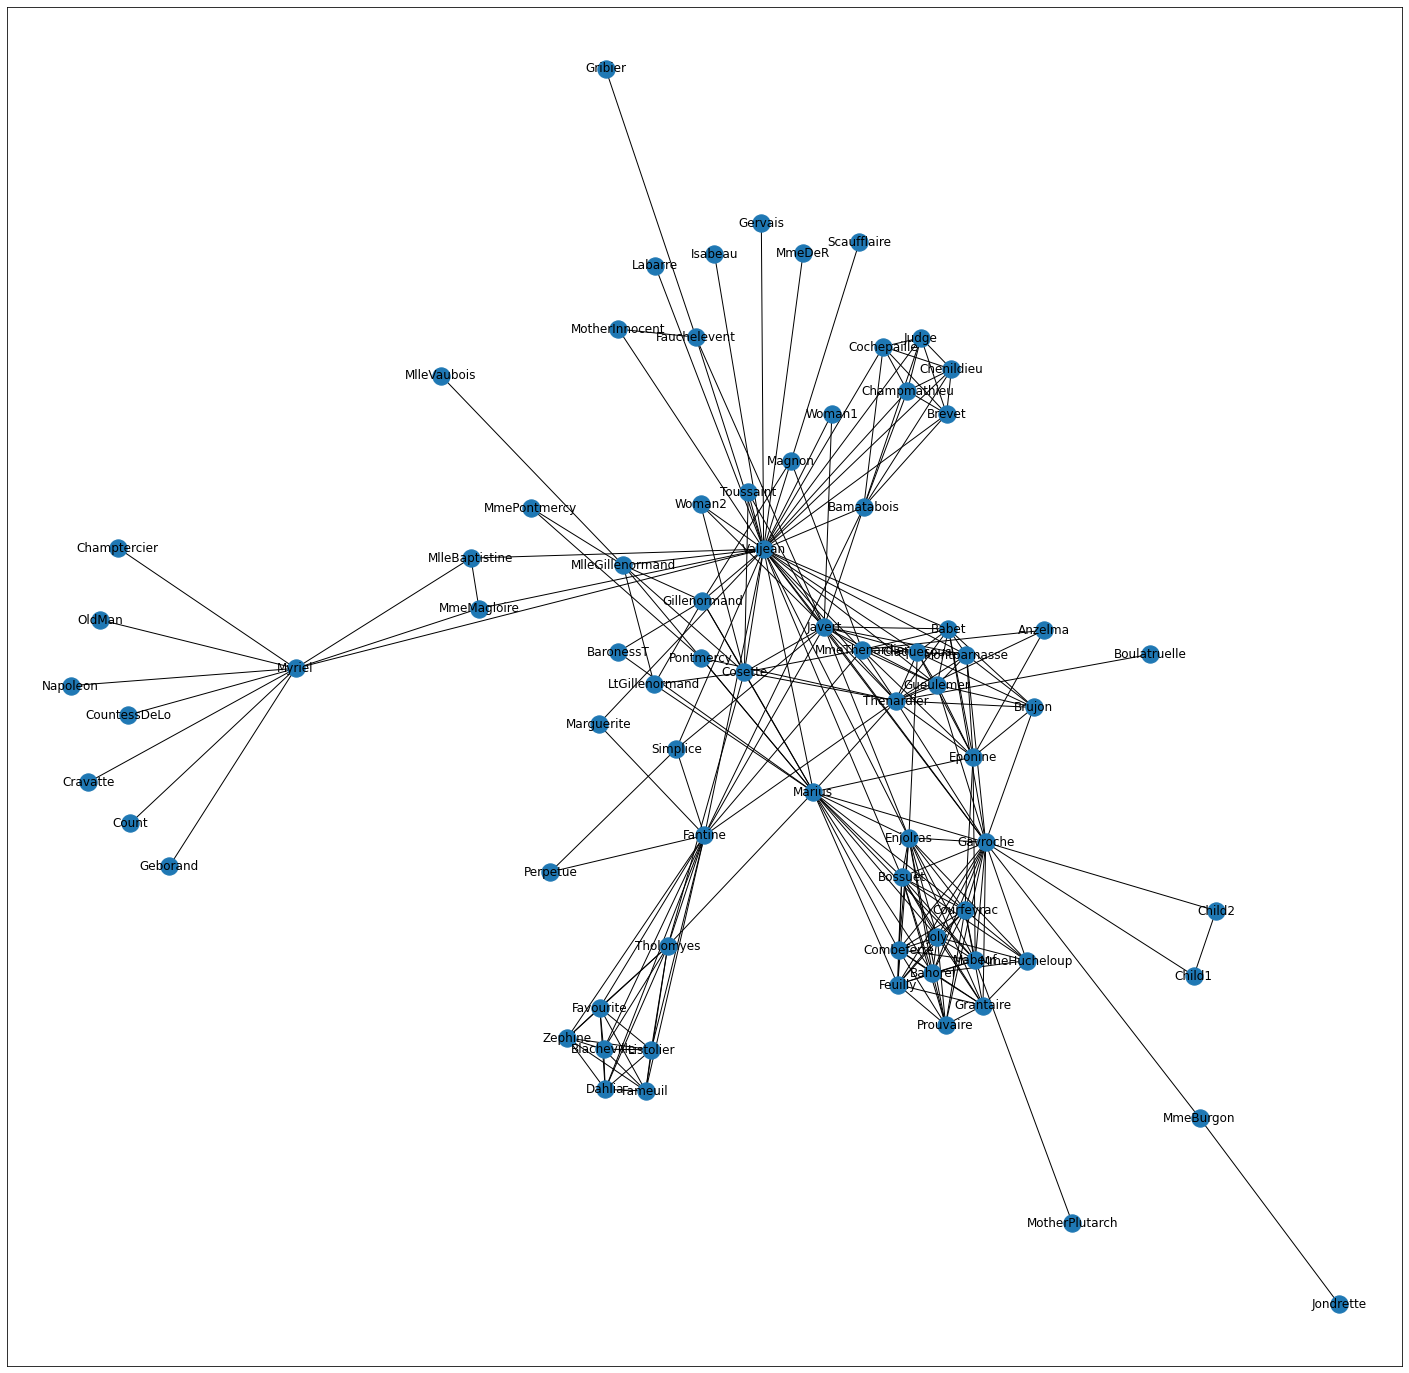

In [81]:

Gl = nx.gml.read_gml('./lesmis.gml')
nx.draw_networkx(Gl)

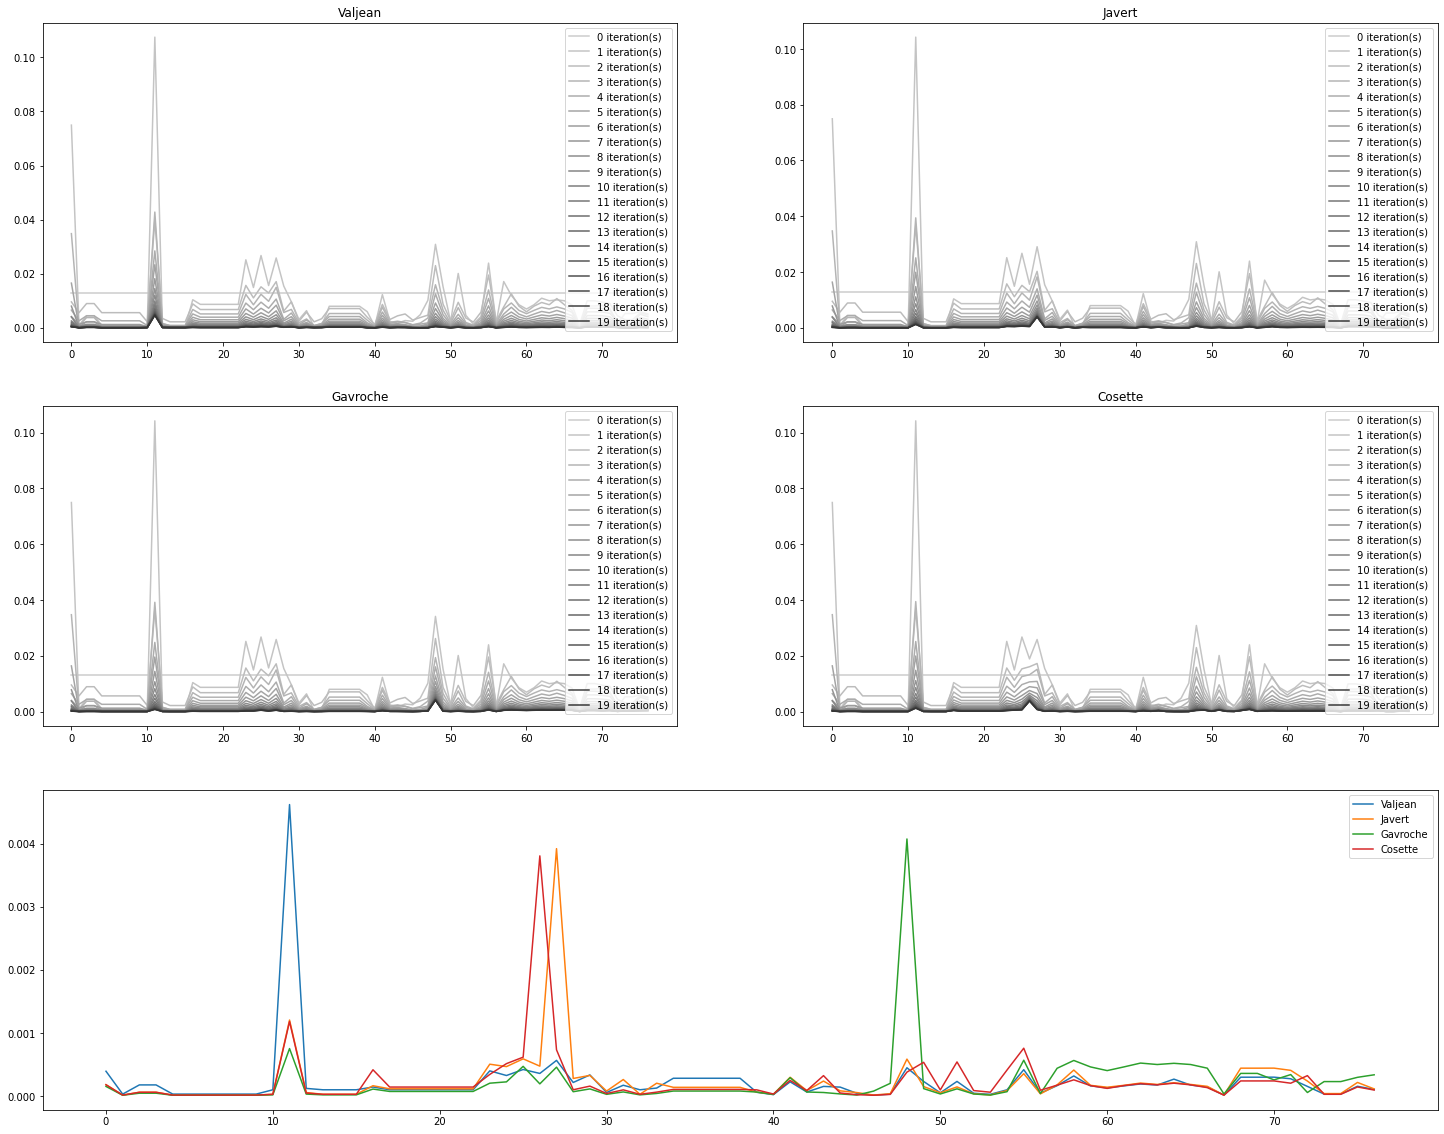

In [84]:


char_names = ['Valjean', 'Javert', 'Gavroche', 'Cosette']
char_ixes = [list(Gl.nodes).index(x) for x in char_names]

def mypagerank_1(G,alpha,k, e):
    degrees=[x[1] for x in list(G.degree)]
    A = nx.adj_matrix(G)
    D = np.diag(degrees)
#     e = np.ones_like(degrees)
    p = np.ones_like(degrees)/len(degrees)
    for i in range(k):
        p = alpha*(np.linalg.inv(D)@A).T@p + (1-alpha) * e/len(degrees)
    return p

fig = plt.figure(1, figsize=(25,20))

big_ax=plt.subplot(313)
for i,(char_name, char_ix) in enumerate(zip(char_names, char_ixes)):
    e = np.zeros(len(Gl.degree))
    e[char_ix]=1
    pr_vals = []
    ax = plt.subplot(320+i+1)
    for it in range(20):
        pr = mypagerank_1(Gl, 0.75, it, e)
        prval = list(pr)
        ax.plot(prval, label='{:d} iteration(s)'.format(it), color=str(1-((it/32)+0.2)))
    big_ax.plot(prval,label=char_name)
    ax.set_title(char_name)
    ax.legend()
big_ax.legend()
plt.show()

In [82]:
list(Gl.nodes)[48]

'Gavroche'

## Task 3

Let us now focus on larger networks. First let us read the network of political blogs.

In [86]:
#Some arcs are multi and it prevents some algorithms to work. We thus simplify it.

G = nx.read_gml('polblogs (copy).gml')
A = nx.adjacency_matrix(G)
M = A.astype(bool).astype(int) #converts non-zero entries to True and then True to 1.
H = nx.DiGraph(M)
L = list(G)
mapping={}
for i in range(len(L)):
    mapping[i]=L[i]
Gsimp=nx.relabel_nodes(H,mapping) #relabel vertices with original names.

Run the HITS algorithm on `Gsimp` and plot the hubs score against the authorities score.

In [94]:
(h, a) = nx.hits(Gsimp)

In [105]:
la = list()
lh = list()
for v in h.keys():
    la.append(a[v])
    lh.append(h[v])
    

Text(0, 0.5, 'Auth')

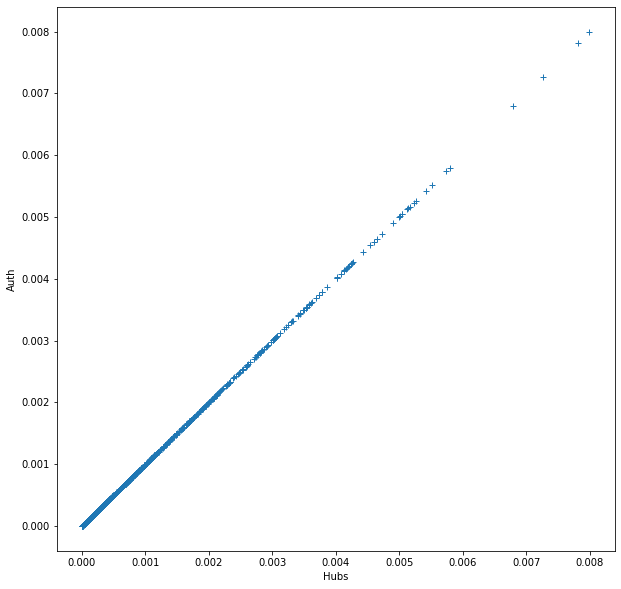

In [106]:
plt.figure(figsize=(10,10))
# la = list(a.values())
# lh = list(h.values())
plt.plot(lh,la, '+')
plt.xlabel('Hubs')
plt.ylabel('Auth')

In [96]:
# plt.hist(list([b for a,b in Gsimp.degree]))

Vizualize top Authorities colored in blue with sizes proportional to A-value and their common Hubs coloured in green with size proportional to H-value.

In [ ]:
# Your code